# Welcome Back to *NTC - Technology and Innovation* in 2025

<img src="https://images7.memedroid.com/images/UPLOADED175/5599b18a512e7.jpeg" alt="Funny Bitcoin Meme" width="500"/>



# Bitcoin Price Forecasting: Next Steps

## 1. Brief exploration and presentation of existing works
- What work already exists on Bitcoin price forecasting?
- What can we learn from it?
- What methods, models, and data sources can we use for our task?
- Sources: Google Scholar, Medium, DataScienceDirect, research papers, etc.

## 2. Research Additional Features and Useful Data Sources
- Are there other features besides Bitcoin sentiment that could improve our predictions?
- Possible additional data: stock prices, weather data, gold prices, commodities, macroeconomic indicators.
- How can we access these datasets (APIs, web scraping, financial data platforms)?

## 3. Exploratory Data Analysis (EDA) of Bitcoin Price Data and Bitcoin Sentiment Dataset
- What are common characteristics in our data?
  - Seasonality
  - Long-run cycles and periods
  - Trends
  - Outliers
  - Abrupt changes and anomalies
  - Behavior of lagged variables

## 4. Example Structure of the EDA Analysis
The following sections include Python code snippets demonstrating key steps in time series EDA using a synthetic dataset.


#### **A: Generation of Synthetic dataset**

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

# Generate date range
date_range = pd.date_range(start='2020-01-01', periods=365, freq='D')

# Create trend component (linear increase)
trend = np.linspace(0, 10, 365)

# Create seasonal component (sine wave)
seasonality = 3 * np.sin(np.linspace(0, 2 * np.pi, 365))

# Add some random noise
noise = np.random.normal(0, 1, 365)

# Combine components into time series
data = trend + seasonality + noise

# Create DataFrame
df = pd.DataFrame({'Date': date_range, 'Value': data})

# Save the dataset
df.to_csv('synthetic_time_series.csv', index=False)

# Display first few rows
df.head()


,Date,Value
0,2020-01-01,0.496714
1,2020-01-02,-0.059010
2,2020-01-03,0.806182
3,2020-01-04,1.760731
4,2020-01-05,0.082710


#### **B: Loading the synthetic dataset**  

- Read the time series data (CSV, database, API, etc.).

- Check for missing values and handle them.

- Convert date columns into a proper datetime format.

- Ensure correct time intervals (e.g., daily, monthly).

In [ ]:

# Load the dataset
df = pd.read_csv('synthetic_time_series.csv', parse_dates=['Date'])

# Inspect first few rows
print(df.head())

# Check for missing values
print(df.isnull().sum())


        Date     Value
0 2020-01-01  0.496714
1 2020-01-02 -0.059010
2 2020-01-03  0.806182
3 2020-01-04  1.760731
4 2020-01-05  0.082710
Date     0
Value    0
dtype: int64


#### **C: Data Cleaning**  

- Identify missing timestamps.

- Use interpolation, forward fill, or backward fill to handle missing values.

- Remove extreme outliers if necessary.

In [ ]:

# Simulating missing values
df.loc[np.random.choice(df.index, 10, replace=False), 'Value'] = np.nan

# Fill missing values using forward fill
df['Value'] = df['Value'].fillna(method='ffill')

# Check again for missing values
print(df.isnull().sum())


Date     0
Value    0
dtype: int64


<ipython-input-15-0597c30e0e8b>:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Value'] = df['Value'].fillna(method='ffill')


#### **D: Visualizing the Time Series**
- Line Plot: To observe general trends and patterns.

- Histogram/Box Plot: To understand distribution and detect outliers.

- Seasonal Decomposition: Use STL decomposition to break down trends, - seasonality, and residuals.

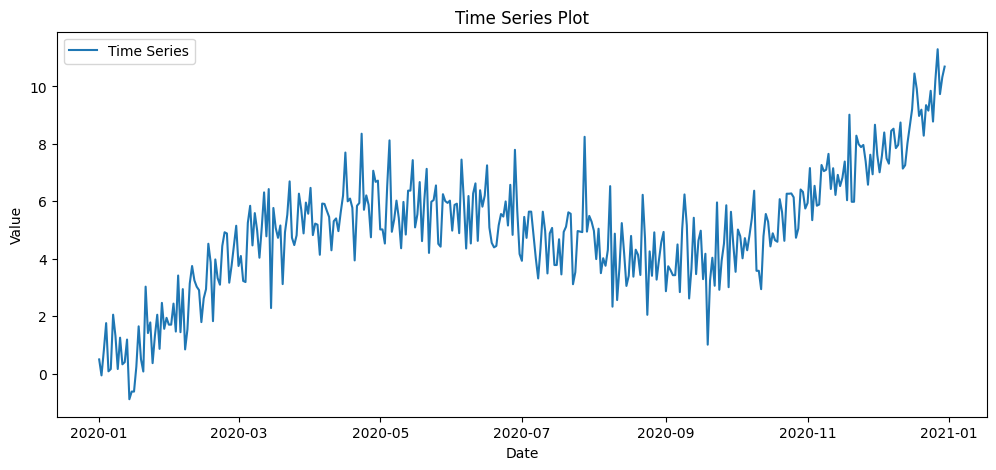

In [ ]:

plt.figure(figsize=(12, 5))
plt.plot(df['Date'], df['Value'], label="Time Series")
plt.xlabel("Date")
plt.ylabel("Value")
plt.title("Time Series Plot")
plt.legend()
plt.show()


#### **E: Checking for Trends and Seasonality**
- Identify long-term upward/downward trends.

- Use moving averages or rolling statistics to smooth fluctuations.

- Check for seasonal patterns using decomposition or autocorrelation plots.

Example:
- Use additive/multiplicative decomposition to separate trend, seasonality, and noise components.

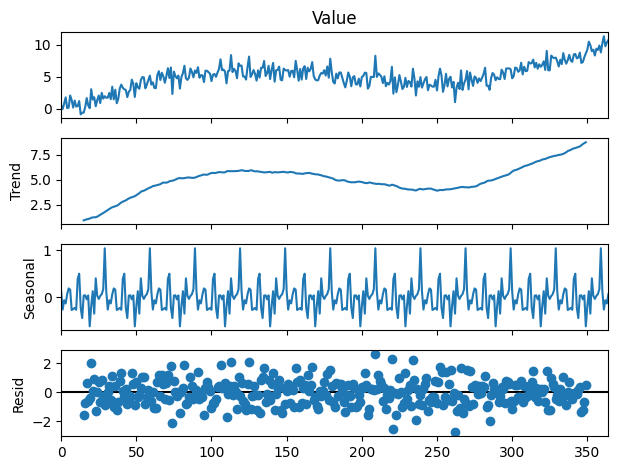

In [ ]:

from statsmodels.tsa.seasonal import seasonal_decompose

# Perform decomposition
decomposition = seasonal_decompose(df['Value'], model='additive', period=30)

# Plot decomposed components
decomposition.plot()
plt.show()


#### **F: Testing Stationarity**

- Apply Augmented Dickey-Fuller (ADF) Test to check stationarity.

- If non-stationary, differentiate the series to remove trends.

In [ ]:

from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test
adf_test = adfuller(df['Value'])
print(f"ADF Statistic: {adf_test[0]}")
print(f"p-value: {adf_test[1]}")


ADF Statistic: -0.5382227540791065
p-value: 0.8843393084715988


#### **G: Autocorrelation Analysis**
- Autocorrelation Function (ACF): Measures the relationship of a series with its past values.

- Partial Autocorrelation Function (PACF): Helps in identifying lag dependencies for modeling.

<Figure size 1200x500 with 0 Axes>

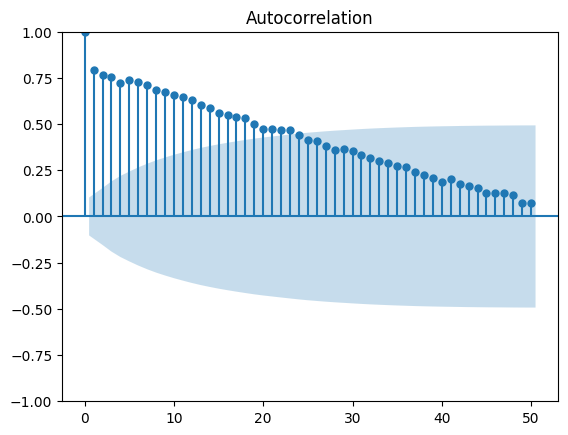

<Figure size 1200x500 with 0 Axes>

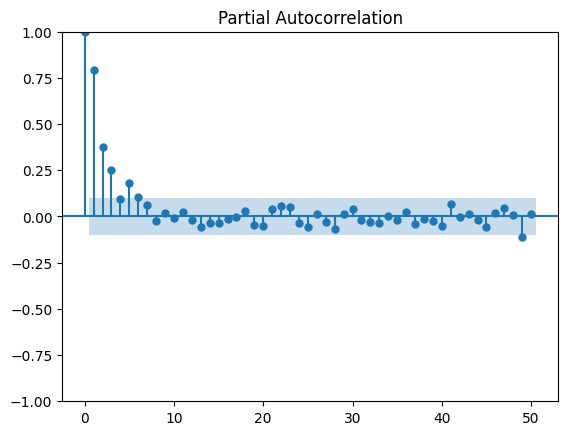

In [ ]:

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12, 5))
plot_acf(df['Value'], lags=50)
plt.show()

plt.figure(figsize=(12, 5))
plot_pacf(df['Value'], lags=50)
plt.show()


#### **H: Feature Engineering:** Decomposition of Time Feature

- Create lag variables to capture past dependencies.

- Generate rolling mean/variance features.

- Extract time-based features (hour, day, month, quarter, year).


In [ ]:

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Day_of_Week'] = df['Date'].dt.dayofweek
df['Lag_1'] = df['Value'].shift(1)
df['Rolling_Mean'] = df['Value'].rolling(window=7).mean()

df.head(10)


,Date,Value,Year,Month,Day,Day_of_Week,Lag_1,Rolling_Mean
0,2020-01-01,0.496714,2020,1,1,2,NaN,NaN
1,2020-01-02,-0.059010,2020,1,2,3,0.496714,NaN
2,2020-01-03,0.806182,2020,1,3,4,-0.059010,NaN
3,2020-01-04,1.760731,2020,1,4,5,0.806182,NaN
4,2020-01-05,0.082710,2020,1,5,6,1.760731,NaN
5,2020-01-06,0.161827,2020,1,6,0,0.082710,NaN
6,2020-01-07,2.054200,2020,1,7,1,0.161827,0.757622
7,2020-01-08,1.321352,2020,1,8,2,2.054200,0.875428
8,2020-01-09,0.163266,2020,1,9,3,1.321352,0.907181
9,2020-01-10,1.254001,2020,1,10,4,0.163266,0.971155


#### **I: Anomaly Detection & Outliers**

- Detect sudden spikes, drops, or irregular patterns using statistical methods (Z-score, IQR etc.).

- Use control charts to find anomalies in the data.




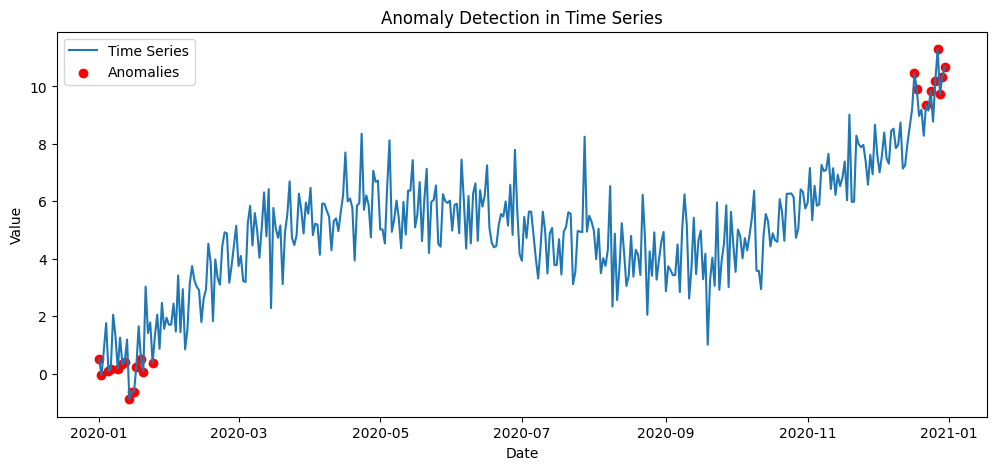

In [ ]:

from scipy.stats import zscore

df['Z_Score'] = zscore(df['Value'])

# Flag anomalies (values beyond ±2 standard deviations)
df['Anomaly'] = df['Z_Score'].apply(lambda x: 1 if abs(x) > 2 else 0)

# Plot anomalies
plt.figure(figsize=(12, 5))
plt.plot(df['Date'], df['Value'], label="Time Series")
plt.scatter(df[df['Anomaly'] == 1]['Date'], df[df['Anomaly'] == 1]['Value'], color='red', label="Anomalies")
plt.xlabel("Date")
plt.ylabel("Value")
plt.title("Anomaly Detection in Time Series")
plt.legend()
plt.show()


#### **J: optional(Resampling & Aggregation)**

- Convert data into different time granularities (daily to weekly, hourly to daily).

- Aggregate values using mean, sum, median, etc.


<ipython-input-22-99861b28bebc>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.resample('M').mean()


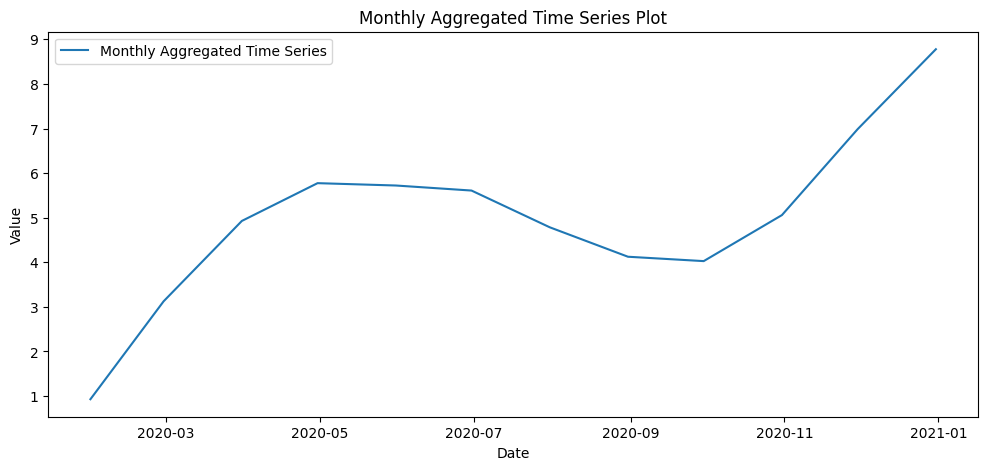

In [ ]:

# Resample to monthly level
df.set_index('Date', inplace=True)
df_monthly = df.resample('M').mean()

# Plot the resampled data
plt.figure(figsize=(12, 5))
plt.plot(df_monthly.index, df_monthly['Value'], label="Monthly Aggregated Time Series")
plt.xlabel("Date")
plt.ylabel("Value")
plt.title("Monthly Aggregated Time Series Plot")
plt.legend()
plt.show()
